In [104]:
# Importing all the libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import math

In [81]:
# Creating dataset
df = pd.read_csv('regression_data_clean.csv')

In [82]:
# First look at the data
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [83]:
# checking for NaN
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [84]:
# checking for white spaces
df.eq(' ').sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [85]:
# Checking data types
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [86]:
# Changing the data type of data and zipcode
df['date']=pd.to_datetime(df['date'])
df['zipcode']=df['zipcode'].astype(str)

In [87]:
df.eq(' ').sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [88]:
# Checking overall information about the numerical data
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


(array([2.180e+02, 1.457e+03, 3.089e+03, 3.271e+03, 3.056e+03, 2.419e+03,
        2.034e+03, 1.464e+03, 1.157e+03, 8.880e+02, 5.930e+02, 4.180e+02,
        2.380e+02, 1.740e+02, 1.770e+02, 1.350e+02, 1.320e+02, 9.100e+01,
        8.100e+01, 7.900e+01, 4.200e+01, 6.600e+01, 3.800e+01, 4.000e+01,
        2.900e+01, 1.900e+01, 7.000e+00, 2.300e+01, 1.800e+01, 1.600e+01,
        1.500e+01, 1.700e+01, 1.200e+01, 5.000e+00, 8.000e+00, 4.000e+00,
        5.000e+00, 1.000e+01, 7.000e+00, 7.000e+00, 6.000e+00, 0.000e+00,
        6.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

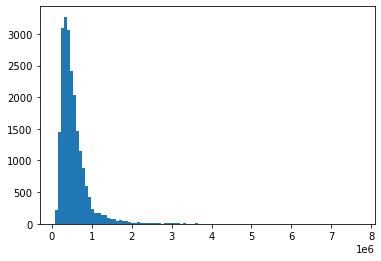

In [89]:
# Checking the distribution of the price
plt.hist(df['price'], bins=100)

### The distribution seems normal and skewed to the right

(array([9.000e+00, 2.700e+01, 8.400e+01, 2.570e+02, 5.030e+02, 7.660e+02,
        9.420e+02, 1.353e+03, 1.356e+03, 1.445e+03, 1.411e+03, 1.294e+03,
        1.150e+03, 1.032e+03, 9.700e+02, 8.380e+02, 7.300e+02, 6.530e+02,
        5.740e+02, 5.860e+02, 5.250e+02, 4.630e+02, 4.920e+02, 4.130e+02,
        4.200e+02, 4.170e+02, 3.290e+02, 2.710e+02, 2.570e+02, 2.510e+02,
        2.320e+02, 2.360e+02, 1.660e+02, 1.680e+02, 1.350e+02, 1.150e+02,
        8.600e+01, 7.200e+01, 8.000e+01, 6.400e+01, 6.700e+01, 5.400e+01,
        3.900e+01, 3.800e+01, 3.600e+01, 2.600e+01, 2.200e+01, 1.500e+01,
        1.600e+01, 1.100e+01, 1.200e+01, 1.200e+01, 8.000e+00, 9.000e+00,
        4.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 7.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

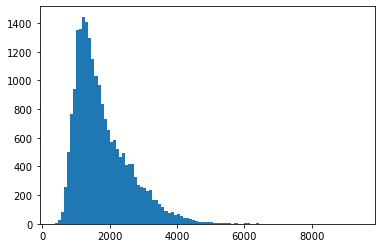

In [90]:
# Check distribution of the sqft_above
plt.hist(df['sqft_above'], bins=100)


### Once again, the distribution seems normal and skewed to the right

In [91]:
# getting rid of some columns that are none useful for the model
df = df.drop(['lat','long','zipcode','date'], axis=1)

In [92]:
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000


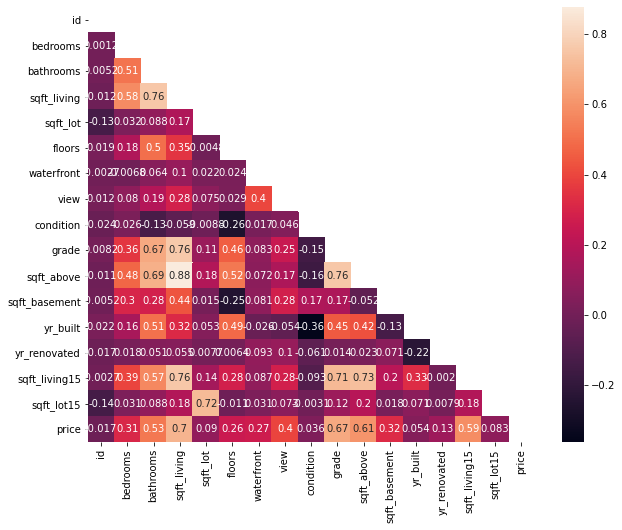

In [93]:
# creating a correlation matrix
corrMatrix = df.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.show()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()

In [94]:
corrMatrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,0.713867,0.120981,0.667951


### we can see there is a strong correlation between: 
- bathrooms and sqft_living
- sqft_living15 and sqft_living
- sqft_living and grade
- sqft_living and price
- sqft_lot and sqft_lot15
- sqft_above and grade
- sqft_living15 and grade
- sqft_living15 and sqft_above 

I will remove:
- sqft_living15
- sqft_lot15
- sqft_living
- sqft_above

In [95]:
# getting rid of these columns
dfreg = df.drop(['sqft_living15','sqft_lot15','sqft_living','sqft_above'], axis=1)

In [96]:
X = dfreg.iloc[:, :-1].values
y = dfreg.iloc[:, -1].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [98]:
dfreg

,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,price
0,7129300520,3,1.00,5650,1.0,0,0,3,7,0,1955,0,221900
1,6414100192,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,538000
2,5631500400,2,1.00,10000,1.0,0,0,3,6,0,1933,0,180000
3,2487200875,4,3.00,5000,1.0,0,0,5,7,910,1965,0,604000
4,1954400510,3,2.00,8080,1.0,0,0,3,8,0,1987,0,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1131,3.0,0,0,3,8,0,2009,0,360000
21593,6600060120,4,2.50,5813,2.0,0,0,3,8,0,2014,0,400000
21594,1523300141,2,0.75,1350,2.0,0,0,3,7,0,2009,0,402101
21595,291310100,3,2.50,2388,2.0,0,0,3,8,0,2004,0,400000


In [99]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [100]:
regressor.score(X_test,y_test)


0.6342432890667276

In [101]:
# predicting the test se result
y_pred = regressor.predict(X_test)

In [105]:
mse = mean_squared_error(y_test, y_pred) 
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print(r2)

45573663862.80973
213479.89100336764
0.6342432890667276


### I actual thought the regressor score was different from the r-square which is why I ran it 2 times :). as we can see, we get a huge mse and rmse and a fairly low (r-squared) which mose likely means that we have a lot of outliers.

### Let's check that a bit more

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015863FE1340>,
      dtype=object)

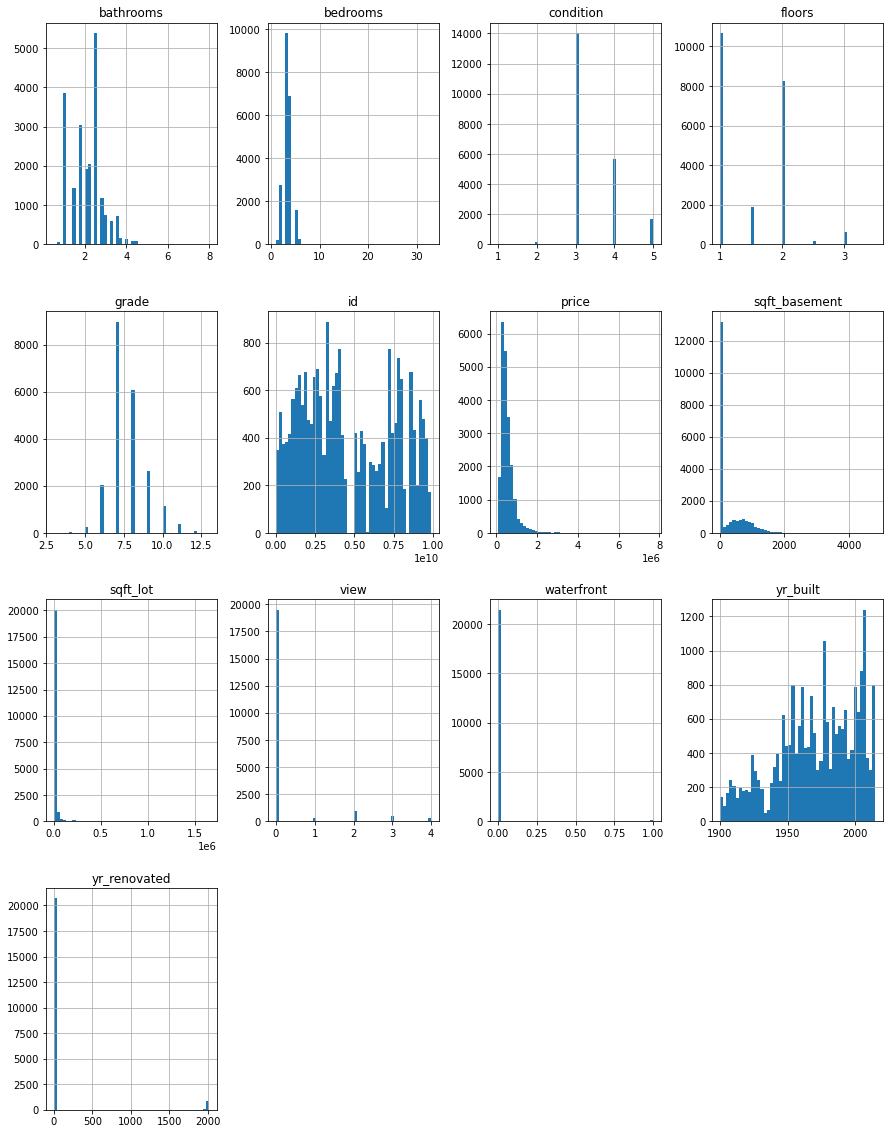

In [109]:
dfreg.hist(figsize = (15,20), bins=50)

Here are some observations that can be made:
- I know remembered that we had some weird outlier when doing the SQL task with a house that had 33 bathrooms
- It also looks like there are a lot of null values in sqft_basement,sqft_lot, view, waterfront and yr_renovated which could make these columns useless

In [110]:
df.eq(0).sum()

id                   0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront       21434
view             19475
condition            0
grade                0
sqft_above           0
sqft_basement    13110
yr_built             0
yr_renovated     20683
sqft_living15        0
sqft_lot15           0
price                0
dtype: int64

I will drop these columns and bring back sqft_living then try to run the model again

In [154]:
dfreg2 = df.drop(['sqft_living15','sqft_lot15','sqft_above','waterfront','view','sqft_basement','yr_renovated'], axis=1)
dfreg2


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,price
0,7129300520,3,1.00,1180,5650,1.0,3,7,1955,221900
1,6414100192,3,2.25,2570,7242,2.0,3,7,1951,538000
2,5631500400,2,1.00,770,10000,1.0,3,6,1933,180000
3,2487200875,4,3.00,1960,5000,1.0,5,7,1965,604000
4,1954400510,3,2.00,1680,8080,1.0,3,8,1987,510000
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,3,8,2009,360000
21593,6600060120,4,2.50,2310,5813,2.0,3,8,2014,400000
21594,1523300141,2,0.75,1020,1350,2.0,3,7,2009,402101
21595,291310100,3,2.50,1600,2388,2.0,3,8,2004,400000


In [144]:
X2 = dfreg2.iloc[:, :-1].values
y2 = dfreg2.iloc[:, -1].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)
y_pred2 = regressor.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2) 
rmse2 = math.sqrt(mse2)
r22 = r2_score(y_test2, y_pred2)
print(mse2)
print(rmse2)
print(r22)

46585852145.33203
215837.55962605774
0.6261198549233808


That's not really better, maybe a bit worse, I will try a logarithmic transformation with the price

In [145]:
# creating a function for the transformation
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [146]:
dfreg['price_log'] = list(map(log_transfom_clean_, dfreg['price']))
dfreg

,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,price,price_log
0,7129300520,3,1.00,5650,1.0,0,0,3,7,0,1955,0,221900,12.309982
1,6414100192,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,538000,13.195614
2,5631500400,2,1.00,10000,1.0,0,0,3,6,0,1933,0,180000,12.100712
3,2487200875,4,3.00,5000,1.0,0,0,5,7,910,1965,0,604000,13.311329
4,1954400510,3,2.00,8080,1.0,0,0,3,8,0,1987,0,510000,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1131,3.0,0,0,3,8,0,2009,0,360000,12.793859
21593,6600060120,4,2.50,5813,2.0,0,0,3,8,0,2014,0,400000,12.899220
21594,1523300141,2,0.75,1350,2.0,0,0,3,7,0,2009,0,402101,12.904459
21595,291310100,3,2.50,2388,2.0,0,0,3,8,0,2004,0,400000,12.899220


In [147]:
X3 = dfreg.iloc[:, :-2].values
y3 = dfreg.iloc[:, -1].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 1/3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train3, y_train3)
y_pred3 = regressor.predict(X_test3)
mse3 = mean_squared_error(y_test3, y_pred3) 
rmse3 = math.sqrt(mse3)
r23 = r2_score(y_test3, y_pred3)
print(mse3)
print(rmse3)
print(r23)

0.09854182886104007
0.3139137283730039
0.6415649718983538


Just a tiny bit better for the r-sqaure but a lot better for mse and rmse, that's already that, let's try another model, for example polynomial regression

In [148]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X3)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y3)
y_pred4 = pol_reg.predict(X_poly)
mse3 = mean_squared_error(y3, y_pred4) 
rmse3 = math.sqrt(mse3)
r23 = r2_score(y3, y_pred4)
print(mse3)
print(rmse3)
print(r23)

0.20386917182700265
0.4515187391759091
0.2646663008674608


Well this is absolutely terrible, so we're gonna stop there I think :D